# Import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Importam Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importam train_test_split function
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [3]:
data =pd.read_csv('Baza de date iteratia 1.csv')

In [4]:
data.head()

,Age,Astm,Alergii /Intoler 1/2,Eo\n%/val,Fumator,Gen,Initial SNOT,Preop HPQ-9,Lund-Mackay,Endoscopy score,mir 125,mir 203,SNOT 6 luni,HPQ-9 6 luni,POSE 6 luni,SNOT 1 an,HPQ-9 1 an,POSE 1 an,Tratament postop
0,74,0,0,1.70,0,0,44,7,14,4,1.80,0.19,2,4,4,2,2,0,1
1,56,0,0,0.00,0,0,16,12,22,6,2.70,0.32,13,9,5,46,10,8,1
2,61,1,1,0.00,0,1,11,2,12,3,1.11,0.53,0,0,1,0,0,0,1
3,53,1,2,0.00,0,1,67,5,22,6,2.39,0.50,19,3,5,29,3,6,1
4,52,0,1,0.64,0,1,24,3,19,5,0.97,0.83,2,2,6,5,3,13,0


In [5]:
# Facem medita dintre valorile celor doua valori pentru celoe doua nari
data['Lund-Mackay']=data['Lund-Mackay']/2
data['Endoscopy score']=data['Endoscopy score']/2
data['POSE 6 luni']=data['POSE 6 luni']/2
data['POSE 1 an']=data['POSE 1 an']/2

In [6]:
# Definim coloanele pe care dorim sa le transformam in int
columns_to_convert = ['Age', 'Astm', 'Alergii /Intoler 1/2', 'Fumator', 'Gen', 'Preop HPQ-9', 
                      'SNOT 6 luni', 'HPQ-9 6 luni', 
                     'HPQ-9 1 an', 'Tratament postop', 'POSE 6 luni', 'POSE 1 an']

# Campurile care nu au valori le puem valoarea 0
data[columns_to_convert] = data[columns_to_convert].fillna(0)

# Convert columns to integers
data[columns_to_convert] = data[columns_to_convert].astype(int)
data.drop(data.index[-1], inplace=True)

# Incadram POSE in intervale

Intervale pentru POSE:

* 0-3 – scazut 1
* 4-7 – mediu 2
* 8-11 mare 3
* 12-15 foarte mare 4

In [7]:
def modify_column(column):
    modified_column = []
    for value in column:
        if value >= 0 and value <= 3:
            modified_column.append(1)
        elif value >= 4 and value <= 7:
            modified_column.append(2)
        elif value >= 8 and value <= 11:
            modified_column.append(3)
        else:
            modified_column.append(4)
      
    return modified_column
data['POSE 6 luni'] = modify_column(data['POSE 6 luni'])
data['POSE 1 an'] = modify_column(data['POSE 1 an'])

In [8]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   79 non-null     int32  
 1   Astm                  79 non-null     int32  
 2   Alergii /Intoler 1/2  79 non-null     int32  
 3   Eo
%/val              79 non-null     float64
 4   Fumator               79 non-null     int32  
 5   Gen                   79 non-null     int32  
 6   Initial SNOT          79 non-null     int64  
 7   Preop HPQ-9           79 non-null     int32  
 8   Lund-Mackay           79 non-null     float64
 9   Endoscopy score       79 non-null     float64
 10  mir 125               79 non-null     float64
 11  mir 203               79 non-null     float64
 12  SNOT 6 luni           79 non-null     int32  
 13  HPQ-9 6 luni          79 non-null     int32  
 14  POSE 6 luni           79 non-null     int64  
 15  SNOT 1 an             79 

,Age,Astm,Alergii /Intoler 1/2,Eo\n%/val,Fumator,Gen,Initial SNOT,Preop HPQ-9,Lund-Mackay,Endoscopy score,mir 125,mir 203,SNOT 6 luni,HPQ-9 6 luni,POSE 6 luni,SNOT 1 an,HPQ-9 1 an,POSE 1 an,Tratament postop
0,74,0,0,1.70,0,0,44,7,7.0,2.0,1.80,0.19,2,4,1,2,2,1,1
1,56,0,0,0.00,0,0,16,12,11.0,3.0,2.70,0.32,13,9,1,46,10,2,1
2,61,1,1,0.00,0,1,11,2,6.0,1.5,1.11,0.53,0,0,1,0,0,1,1
3,53,1,2,0.00,0,1,67,5,11.0,3.0,2.39,0.50,19,3,1,29,3,1,1
4,52,0,1,0.64,0,1,24,3,9.5,2.5,0.97,0.83,2,2,1,5,3,2,0


In [9]:
data['POSE 6 luni'].describe()

count    79.000000
mean      1.417722
std       0.632609
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: POSE 6 luni, dtype: float64

In [10]:
data['POSE 1 an'].describe()

count    79.000000
mean      1.607595
std       0.791262
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: POSE 1 an, dtype: float64

In [11]:
data.describe()

,Age,Astm,Alergii /Intoler 1/2,Eo\n%/val,Fumator,Gen,Initial SNOT,Preop HPQ-9,Lund-Mackay,Endoscopy score,mir 125,mir 203,SNOT 6 luni,HPQ-9 6 luni,POSE 6 luni,SNOT 1 an,HPQ-9 1 an,POSE 1 an,Tratament postop
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,49.658228,0.316456,0.544304,0.256316,0.227848,0.354430,46.177215,5.278481,8.177215,2.113924,1.522911,0.467089,17.784810,3.518987,1.417722,23.924051,3.759494,1.607595,0.455696
std,12.283913,0.468065,0.764559,0.351855,0.422124,0.481397,20.720212,3.785725,1.995248,0.650194,1.150575,0.295189,17.612402,3.245750,0.632609,18.179146,3.134650,0.791262,0.501216
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,4.000000,1.000000,0.210000,0.040000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.500000,2.000000,6.500000,1.500000,0.880000,0.250000,5.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,5.000000,8.000000,2.000000,1.160000,0.400000,13.000000,3.000000,1.000000,20.000000,3.000000,1.000000,0.000000
75%,57.500000,1.000000,1.000000,0.493000,0.000000,1.000000,61.000000,7.500000,10.000000,2.500000,1.895000,0.615000,21.500000,5.000000,2.000000,36.000000,6.000000,2.000000,1.000000
max,80.000000,1.000000,2.000000,1.700000,1.000000,1.000000,99.000000,14.000000,12.000000,3.000000,7.940000,1.730000,73.000000,14.000000,4.000000,75.000000,13.000000,4.000000,1.000000


In [12]:
# Verificam daca avem valori nule
data.isna().sum()

Age                     0
Astm                    0
Alergii /Intoler 1/2    0
Eo\n%/val               0
Fumator                 0
Gen                     0
Initial SNOT            0
Preop HPQ-9             0
Lund-Mackay             0
Endoscopy score         0
mir 125                 0
mir 203                 0
SNOT 6 luni             0
HPQ-9 6 luni            0
POSE 6 luni             0
SNOT 1 an               0
HPQ-9 1 an              0
POSE 1 an               0
Tratament postop        0
dtype: int64

C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


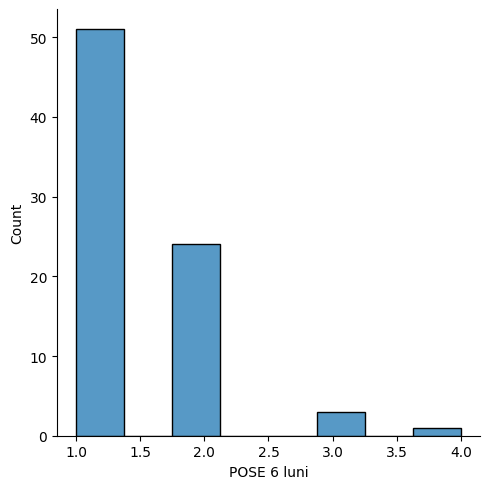

In [13]:
#histogram
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.displot(data['POSE 6 luni'])

C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


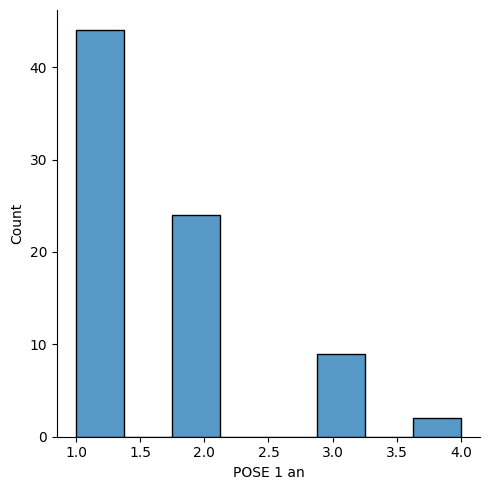

In [14]:
#histogram
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.displot(data['POSE 1 an'])

In [15]:
#Vizualizare pentru fiecare coloana ce valori unice are
for col in data.columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{data[col].unique()}\n\n')

-------------------------------
Column name: Age

Unique values:
[74 56 61 53 52 34 63 50 36 60 42 37 68 41 47 70 46 59 64 32 54 43 65 18
 51 40 44 62 39 55 29 45 66 71 35 48 76 80]


-------------------------------
Column name: Astm

Unique values:
[0 1]


-------------------------------
Column name: Alergii /Intoler 1/2

Unique values:
[0 1 2]


-------------------------------
Column name: Eo
%/val

Unique values:
[1.7   0.    0.64  0.53  0.89  0.36  0.78  0.37  0.88  0.567 0.765 0.582
 0.344 0.855 0.404 0.554 0.402 0.809 0.752 0.329 0.879 0.389 0.583 0.388
 0.721 0.633 0.432 0.456 0.385 0.311 0.358 0.921]


-------------------------------
Column name: Fumator

Unique values:
[0 1]


-------------------------------
Column name: Gen

Unique values:
[0 1]


-------------------------------
Column name: Initial SNOT

Unique values:
[44 16 11 67 24 72 34 50 39 36 85 31 62 66 75 99 30 41 61 55 58 38 54 27
 78 28 32 97 35 17 47 84 19 70 49 26 33 52 60 48 73 46 65 57 63 25 45 22
 29 43 64]



# Vizualization

**Vizualizam datele pentru a determina daca exista outliers.**

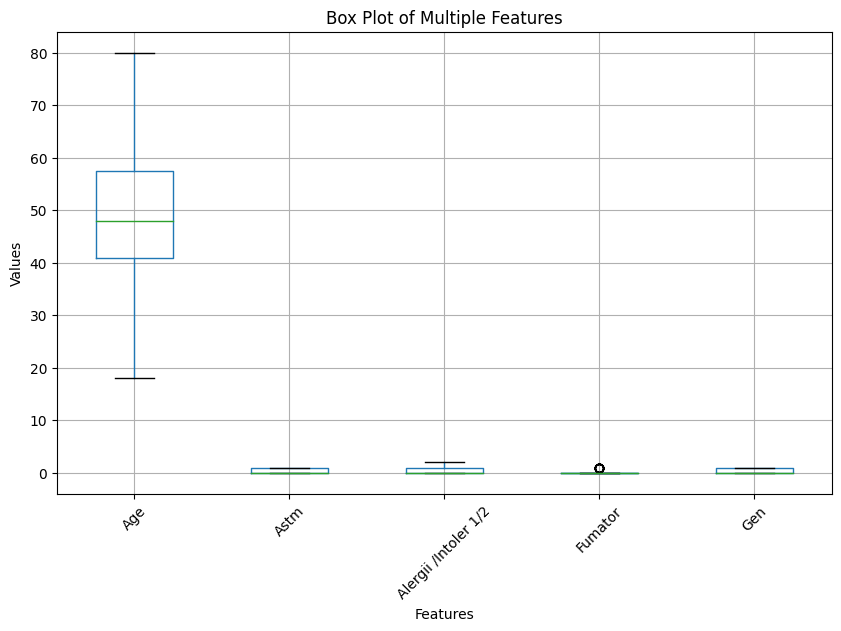

In [16]:
dataForVizualization =['Age', 'Astm', 'Alergii /Intoler 1/2', 'Fumator', 'Gen']
plt.figure(figsize=(10, 6))
data[dataForVizualization].boxplot()
plt.title('Box Plot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

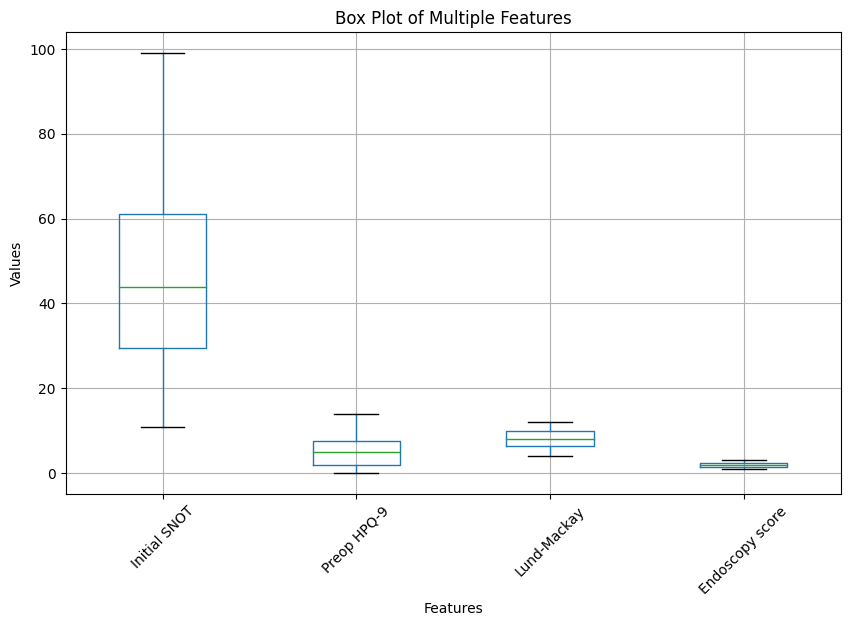

In [17]:
dataForVizualization =['Initial SNOT', 'Preop HPQ-9', 'Lund-Mackay', 'Endoscopy score']
plt.figure(figsize=(10, 6))
data[dataForVizualization].boxplot()
plt.title('Box Plot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

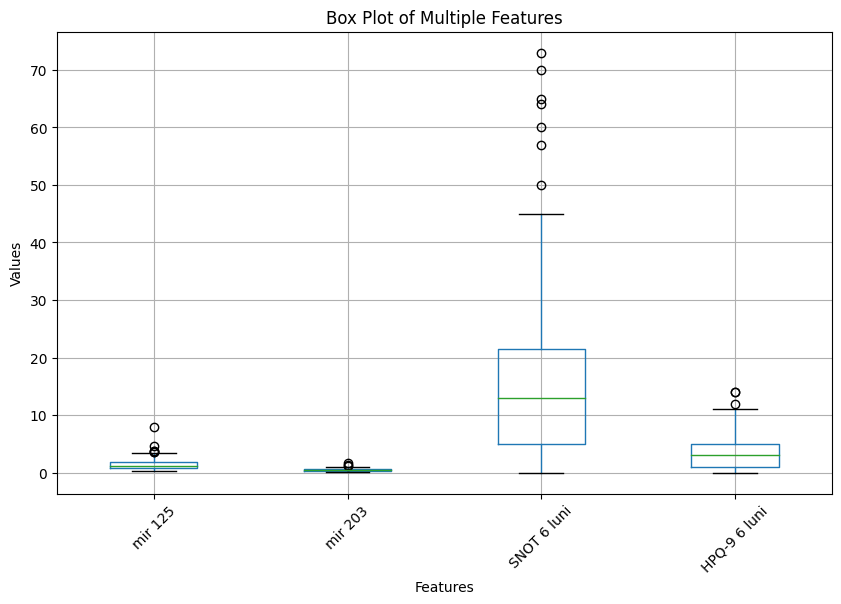

In [18]:
dataForVizualization =['mir 125', 'mir 203', 'SNOT 6 luni', 'HPQ-9 6 luni']
plt.figure(figsize=(10, 6))
data[dataForVizualization].boxplot()
plt.title('Box Plot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

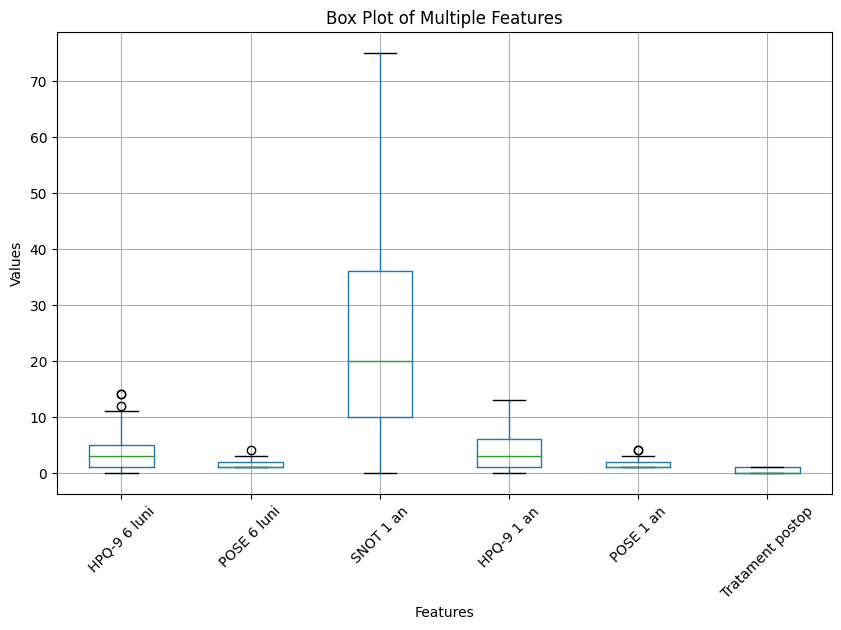

In [19]:
dataForVizualization =['HPQ-9 6 luni', 'POSE 6 luni', 'SNOT 1 an', 'HPQ-9 1 an', 'POSE 1 an','Tratament postop' ]
plt.figure(figsize=(10, 6))
data[dataForVizualization].boxplot()
plt.title('Box Plot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# POSE 6 luni

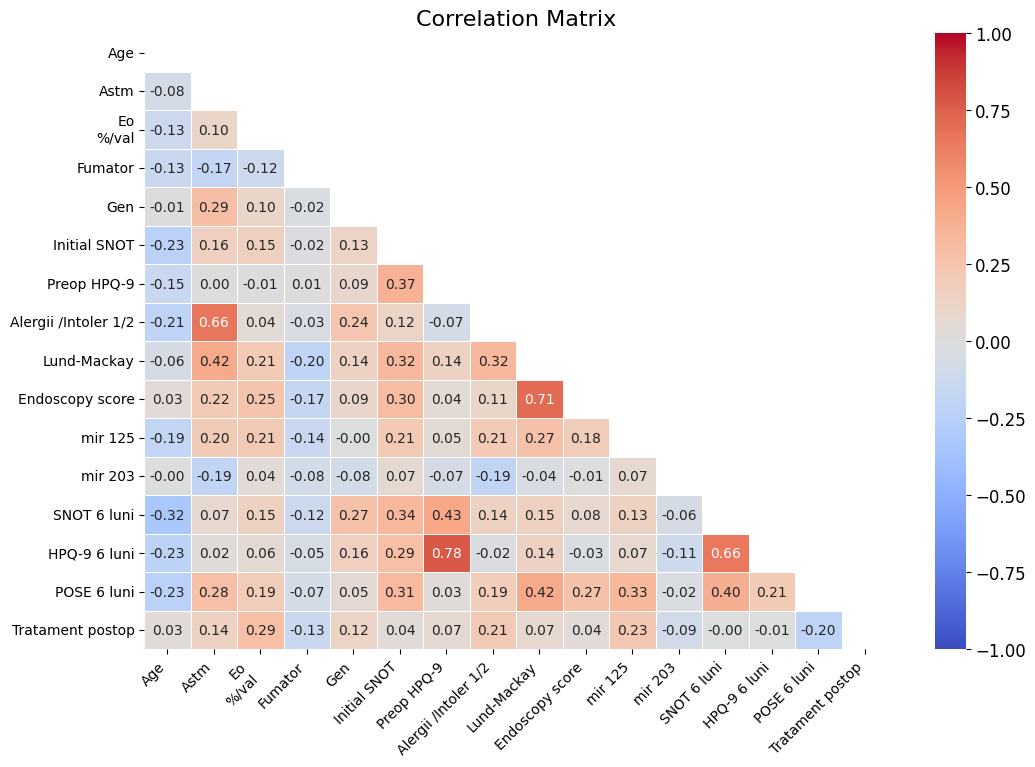

In [20]:
# Calculați matricea de corelație
corr_matrix = data[['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Preop HPQ-9', 'Alergii /Intoler 1/2',
                  'Lund-Mackay', 'Endoscopy score', 'mir 125', 'mir 203', 'SNOT 6 luni', 'HPQ-9 6 luni', 'POSE 6 luni', 'Tratament postop']].corr()

# Generați o mască(mask) pentru triunghiul superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurati matplotlib figure
plt.figure(figsize=(12, 8))

#Desenam heatmap cu masca și corelam raportul aspect ratio
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Adaugam un titlu
plt.title('Correlation Matrix', fontsize=16)

# Rotitim etichetele pe axa x pentru o mai bună lizibilitate
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adaugam color bar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=12)

# Vizualizare
#plt.tight_layout()
plt.show()

Un coeficient de corelație apropiat de 1 indică o corelație pozitivă puternică. Aceasta înseamnă că, pe măsură ce o variabilă crește, cealaltă variabilă tinde să crească, de asemenea, și invers. Un coeficient de corelație apropiat de -1 indică o corelație negativă puternică. Aceasta înseamnă că, pe măsură ce o variabilă crește, cealaltă variabilă tinde să scadă și invers. Un coeficient de corelație apropiat de 0 indică o relație liniară mică sau deloc între variabile.

**ML pentru Pose 6 luni**
Vom folosi urmatoatele campuri:

* Age
* Astm
* Alergii /Intoler 1/2
* Eo %/val
* Fum
* Gen
* Initial SNOT
* Preop HPQ-9
* Lund-Mackay
* Endoscopy score
* mir 125
* mir 203
* SNOT 6 luni
* HPQ-9 6 luni
* Tratament postop


Dintre aceste campuri vom elimina pe baza matricei de mai sus urmatoarele elemente:

* Alergii
* Preop-HPQ-9
* HPQ-9 6 luni
* Endoscopy scor

# Decision Tree classifier

In [21]:
#împărțim setul de date în features si target variable
feature_cols = ['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Lund-Mackay', 'mir 125', 'mir 203', 'SNOT 6 luni', 'Tratament postop']
X = data[feature_cols] # Features
y = data['POSE 6 luni'] # Target variable
# împărțim setul de date în training set si test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Cream Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
train = clf.predict(X_train)
print(y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

[1 1 2 2 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2 1 2 1 1]
Cross-validation scores: [0.375      0.75       0.75       0.25       0.5        0.375
 0.875      0.5        0.625      0.57142857]
Mean accuracy: 0.5571428571428572


C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [22]:
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy train test:",metrics.accuracy_score(y_train, train))

Accuracy test set: 0.7083333333333334
Accuracy train test: 1.0


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[15  5]
 [ 2  2]]


In [24]:
#Vizualizare predictii si valori reale
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
63,1,1
27,1,1
31,1,2
69,2,2
46,1,1
47,1,1
53,1,1
74,1,2
39,1,1
73,1,1


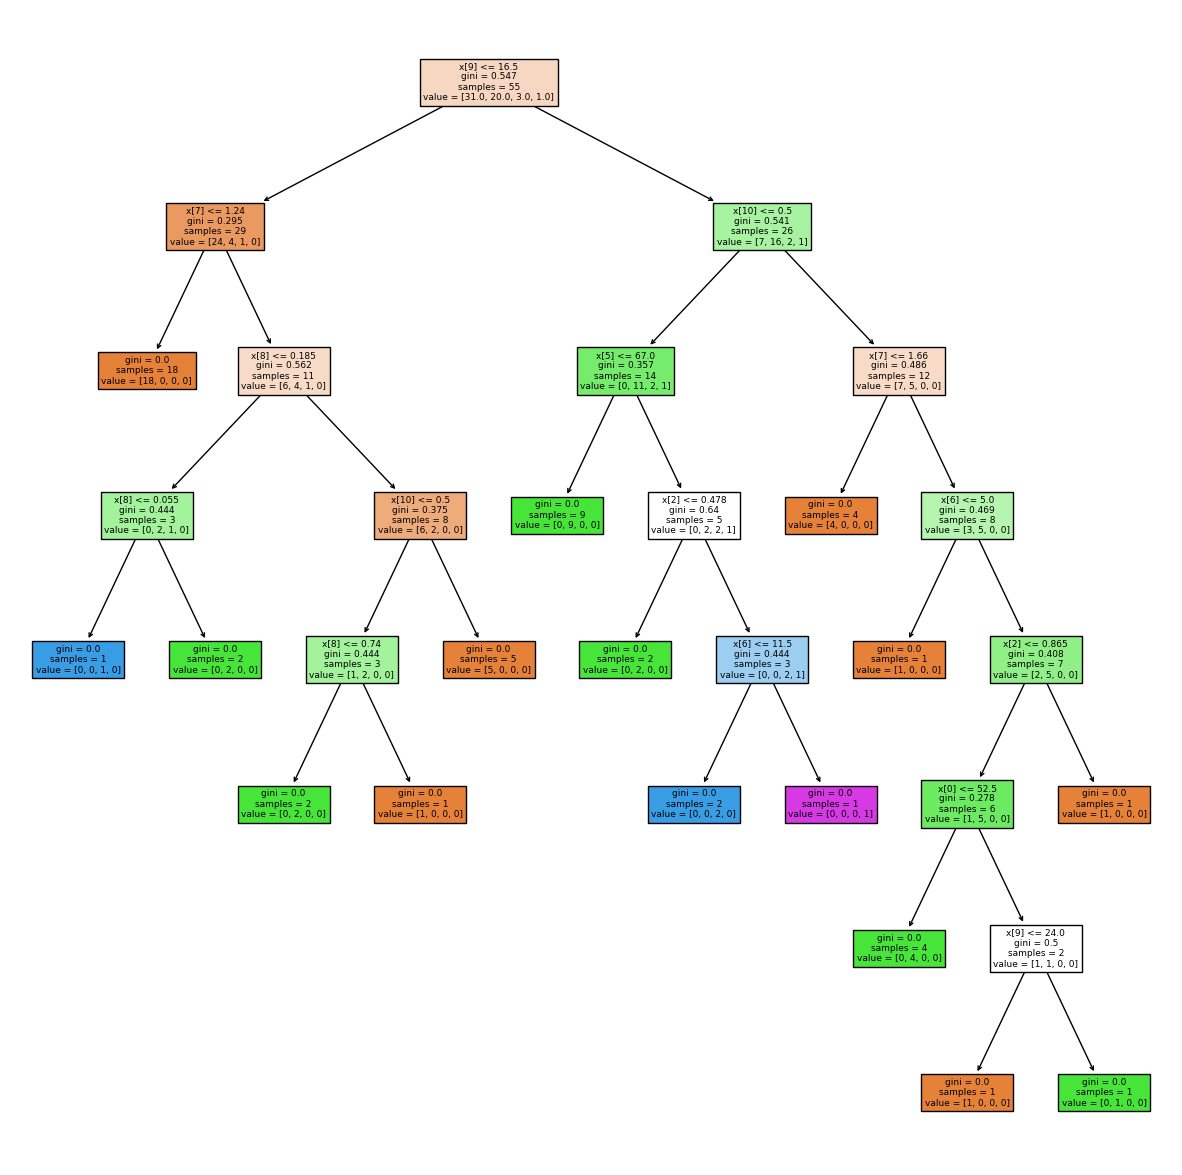

In [25]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, 
                  
                   filled=True)
fig.savefig("decistion_tree.png")

In [26]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

SNOT 6 luni         0.280789
Tratament postop    0.163279
mir 203             0.150141
mir 125             0.148082
Eo\n%/val           0.101658
Lund-Mackay         0.074027
Initial SNOT        0.059855
Age                 0.022168
Astm                0.000000
Fumator             0.000000
Gen                 0.000000
dtype: float64

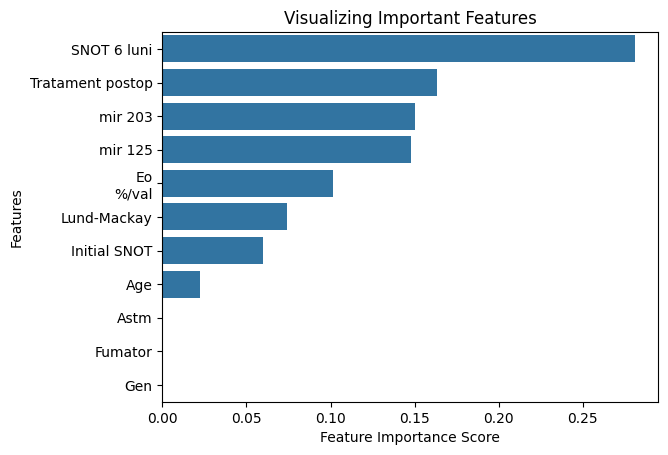

In [27]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Adaugam labels

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Adaugam un titlu

plt.title("Visualizing Important Features")

# Visualizare

plt.show()

# Random Forest classifier

In [28]:
# Split the data into features (X) and target (y)
X = data[['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Lund-Mackay', 'mir 125', 'mir 203', 'SNOT 6 luni', 'Tratament postop']]  # Features
y = data['POSE 6 luni']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy score and classification report to evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

scores = cross_val_score(clf, X, y, cv=10)
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.88      0.86        17
           2       0.60      0.43      0.50         7
           3       0.00      0.00      0.00         0

    accuracy                           0.75        24
   macro avg       0.48      0.44      0.45        24
weighted avg       0.77      0.75      0.75        24

Cross-validation scores: [0.375      0.75       0.875      0.5        0.625      0.5
 0.75       0.5        0.625      0.71428571]
Mean accuracy: 0.6214285714285714


C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [29]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_scores

SNOT 6 luni         0.280789
Tratament postop    0.163279
mir 203             0.150141
mir 125             0.148082
Eo\n%/val           0.101658
Lund-Mackay         0.074027
Initial SNOT        0.059855
Age                 0.022168
Astm                0.000000
Fumator             0.000000
Gen                 0.000000
dtype: float64

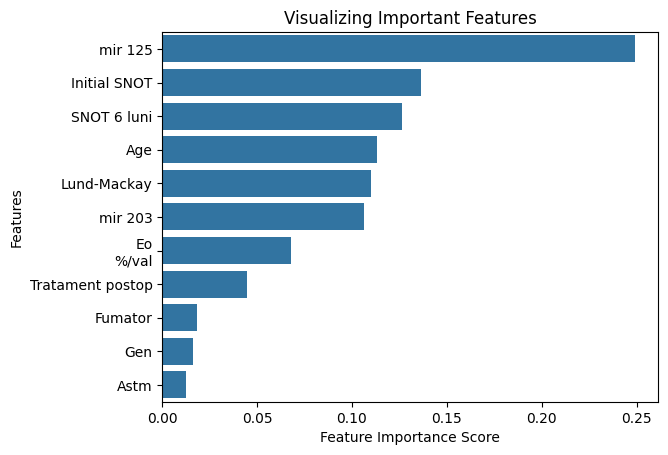

In [30]:
# Creating a seaborn bar plot

sns.barplot(y=feature_importance_df_sorted['Feature'], x=feature_importance_df_sorted['Importance'])

# Adaugam labels

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Adaugam un titlu

plt.title("Visualizing Important Features")

# Visualizare

plt.show()

# POSE 1 an

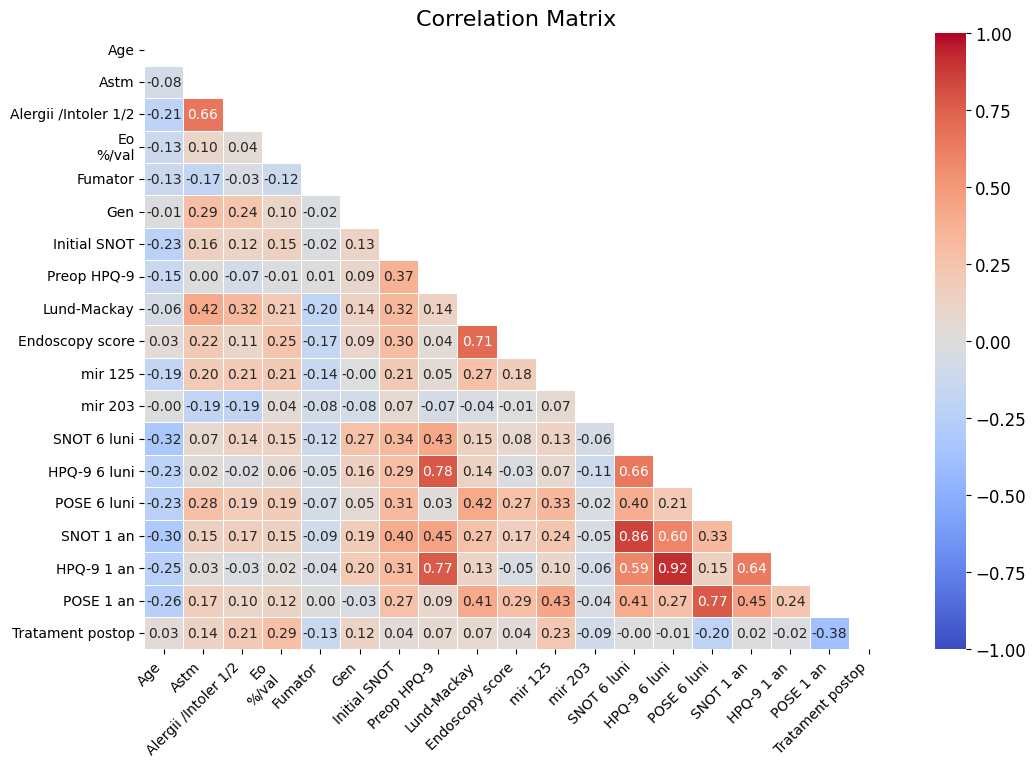

In [31]:
# Calculați matricea de corelație
corr_matrix = data.corr()

# Generați o mască(mask) pentru triunghiul superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurati matplotlib figure
plt.figure(figsize=(12, 8))

#Desenam heatmap cu masca și corelam raportul aspect ratio
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Adaugam un titlu
plt.title('Correlation Matrix', fontsize=16)

# Rotitim etichetele pe axa x pentru o mai bună lizibilitate
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adaugam color bar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=12)

# Vizualizare
#plt.tight_layout()
plt.show()



**ML pentru Pose 1 an**

Vom folosi urmatoatele campuri:

* Age
* Astm
* Alergii /Intoler 1/2
* Eo %/val
* Fum
* Gen
* Initial SNOT
* Preop HPQ-9
* Lund-Mackay
* Endoscopy score
* mir 125
* mir 203
* SNOT 6 luni
* HPQ-9 6 luni
* SNOT 1 an
* HPQ-9 1 an
* Tratament postop

Vom elimina pe baza metricei urmatoarele elemente:

* Alergii
* Preop-HPQ-9
* Endoscopy scor
* HPQ-9 6 luni
* SNOT 6 luni POSE 6 luni

# Decision Tree classifier - POSE 1 an

In [32]:
#împărțim setul de date în features si target variable
feature_cols = ['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Lund-Mackay', 'mir 125', 'mir 203', 'SNOT 1 an', 'Tratament postop', 'HPQ-9 1 an']
X = data[feature_cols] # Features
y = data['POSE 1 an'] # Target variable
# împărțim setul de date in training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
train = clf.predict(X_train)
print(y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

[1 2 1 1 1 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 1 4 1 1]
Cross-validation scores: [0.625      0.5        0.75       0.5        0.75       0.875
 0.75       0.5        0.625      0.42857143]
Mean accuracy: 0.6303571428571428


C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [33]:
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy train set:",metrics.accuracy_score(y_train, train))

Accuracy test set: 0.7083333333333334
Accuracy train set: 1.0


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[14  4  0  0]
 [ 2  3  0  0]
 [ 0  0  0  1]
 [ 0  0  0  0]]


In [35]:
#Vizualizam datele care au  fost prezise si cele reale
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
63,1,1
27,1,2
31,1,1
69,2,1
46,1,1
47,1,1
53,1,1
74,1,2
39,1,1
73,2,2


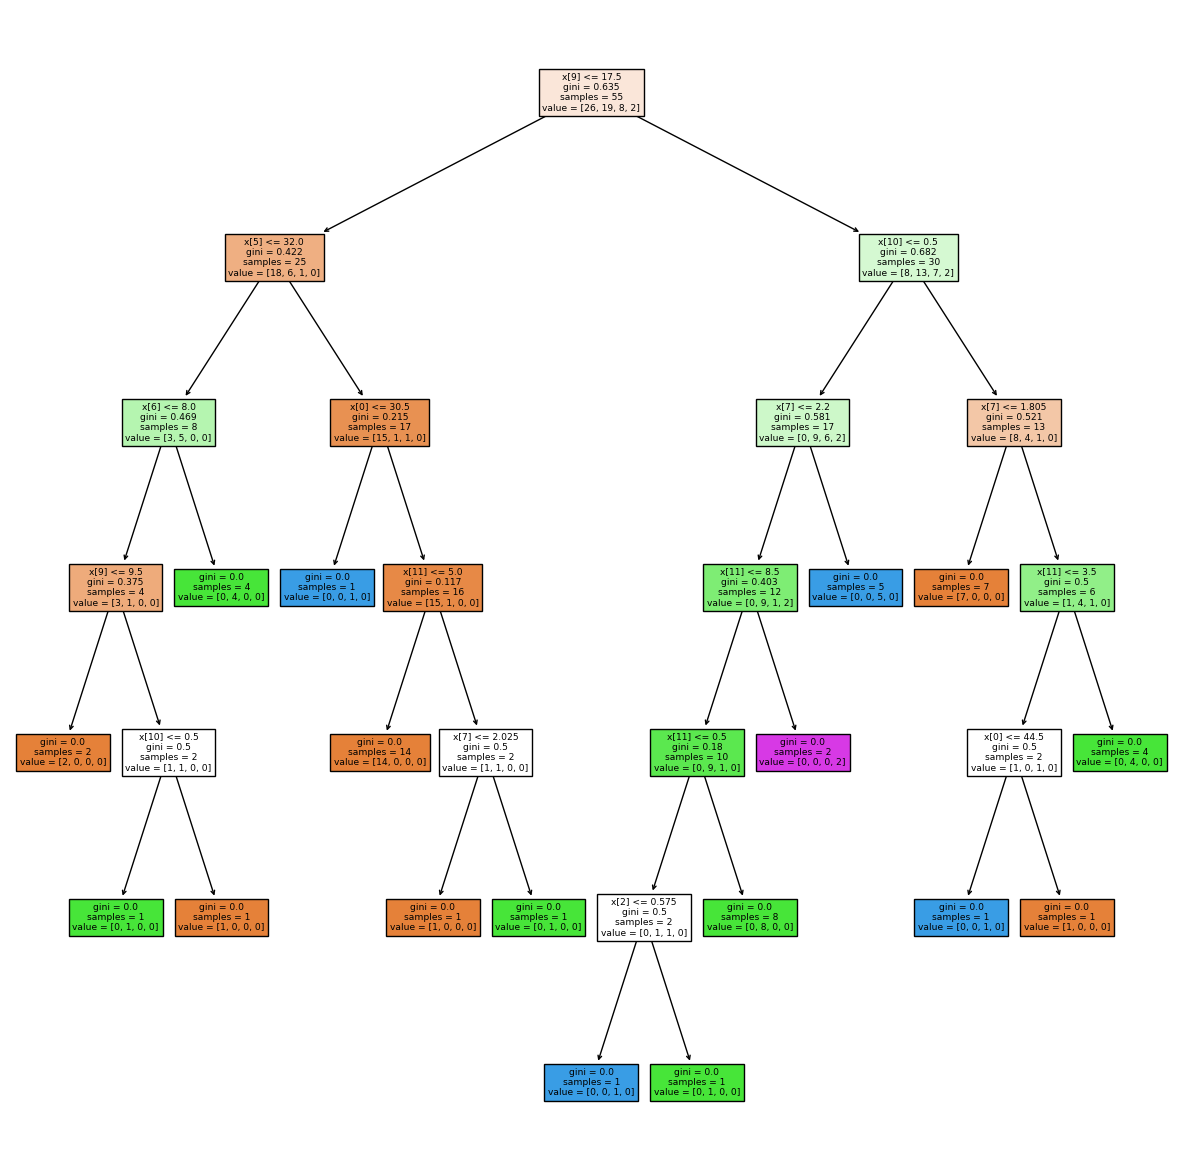

In [36]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, 
                  
                   filled=True)
fig.savefig("decistion_tree.png")

In [37]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

mir 125             0.281252
HPQ-9 1 an          0.192166
Tratament postop    0.137932
SNOT 1 an           0.125538
Initial SNOT        0.090605
Age                 0.079408
Lund-Mackay         0.064453
Eo\n%/val           0.028646
Astm                0.000000
Fumator             0.000000
Gen                 0.000000
mir 203             0.000000
dtype: float64

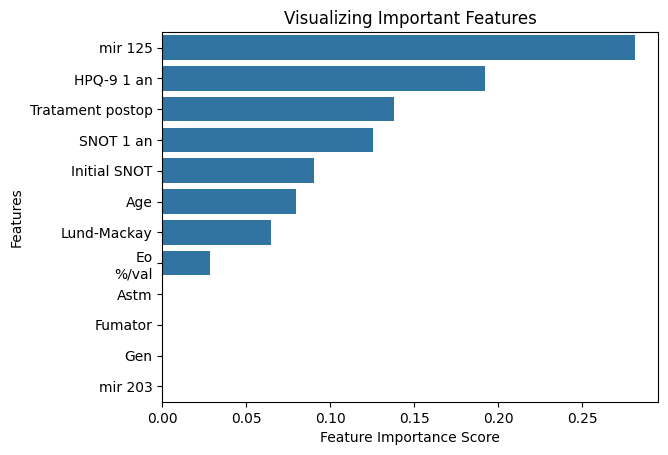

In [38]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Adaugam labels 

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Adaugam titlu

plt.title("Visualizing Important Features")

# Visualizare

plt.show()

# Random Forest classifier - POSE 1 an

In [39]:
# Split the data into features (X) and target (y)
X = data[['Age', 'Astm', 'Eo\n%/val', 'Fumator', 'Gen', 'Initial SNOT', 'Lund-Mackay', 'mir 125', 'mir 203', 'SNOT 1 an', 'Tratament postop', 'HPQ-9 1 an']]  # Features
y = data['POSE 1 an'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy score and classification report to evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

scores = cross_val_score(clf, X, y, cv=10)
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        14
           2       0.50      0.25      0.33         8
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.67        24
   macro avg       0.31      0.31      0.30        24
weighted avg       0.60      0.67      0.61        24

Cross-validation scores: [0.625      0.5        0.75       0.5        0.625      0.875
 0.625      0.5        0.375      0.28571429]
Mean accuracy: 0.5660714285714286


C:\Users\eu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [40]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_scores

mir 125             0.281252
HPQ-9 1 an          0.192166
Tratament postop    0.137932
SNOT 1 an           0.125538
Initial SNOT        0.090605
Age                 0.079408
Lund-Mackay         0.064453
Eo\n%/val           0.028646
Astm                0.000000
Fumator             0.000000
Gen                 0.000000
mir 203             0.000000
dtype: float64

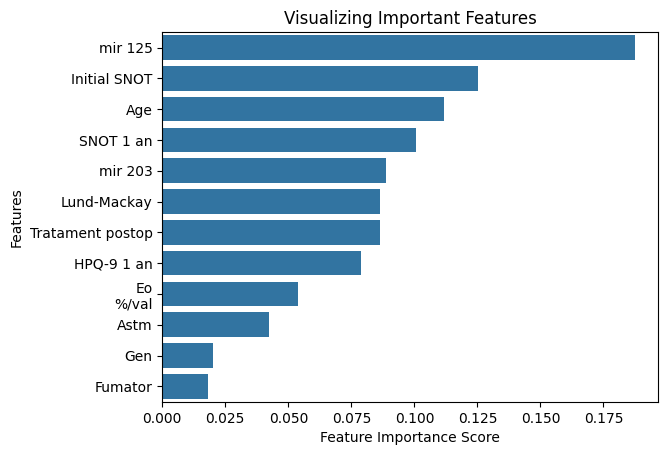

In [41]:
# Creating a seaborn bar plot

sns.barplot(y=feature_importance_df_sorted['Feature'], x=feature_importance_df_sorted['Importance'])

# Adaugam labels

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Adaugam un titlu

plt.title("Visualizing Important Features")

# Visualizare

plt.show()